<a href="https://colab.research.google.com/github/pranitha-pedapudi/IIIT_FMML/blob/main/FMML_M4_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
## Module 4: Perceptron and Gradient Descent
# Lab 3: Gradient Descent
Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.

*   repeat the previous step until some convergence criteria is met.



The key equation for change in weight is: $$ w^{k+1} \leftarrow w^k - \eta \Delta J $$


In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

Creating the Data
Let's generate some data with:

 $$
\begin{align}
y_0 &= 4 \tag{1} \\
y_1 &= 3 \tag{2}
\end{align}
$$


and also add some noise to the data.

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

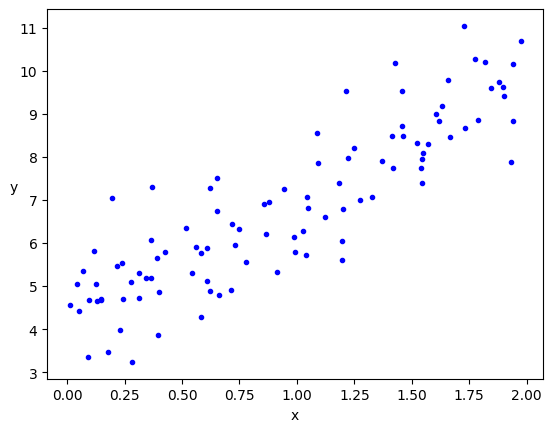

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

# **Cost Function**
The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions
$$
J(y_{\text{pred}}) = \frac{1}{2m} \sum_{i=1}^m \left( h(y_{\text{pred}})^{(i)} - y^{(i)} \right)^2 \tag{3}
$$


In [6]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## **Gradients**
$$
y_{\text{pred}_0} := y_{\text{pred}_0} - \alpha \cdot \left( \frac{1}{m} \sum_{i=1}^m (h(y_{\text{pred}}) - y^{(i)}) \cdot X_0^{(i)} \right) \tag{4}
$$

$$
y_{\text{pred}_1} := y_{\text{pred}_1} - \alpha \cdot \left( \frac{1}{m} \sum_{i=1}^m (h(y_{\text{pred}}) - y^{(i)}) \cdot X_0^{(i)} \right) \tag{5}
$$

$$
y_{\text{pred}_j} := y_{\text{pred}_j} - \alpha \cdot \left( \frac{1}{m} \sum_{i=1}^m (h(y_{\text{pred}}) - y^{(i)}) \cdot X_0^{(i)} \right) \tag{6}
$$




In [7]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01. We will start with a random prediction.

In [8]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

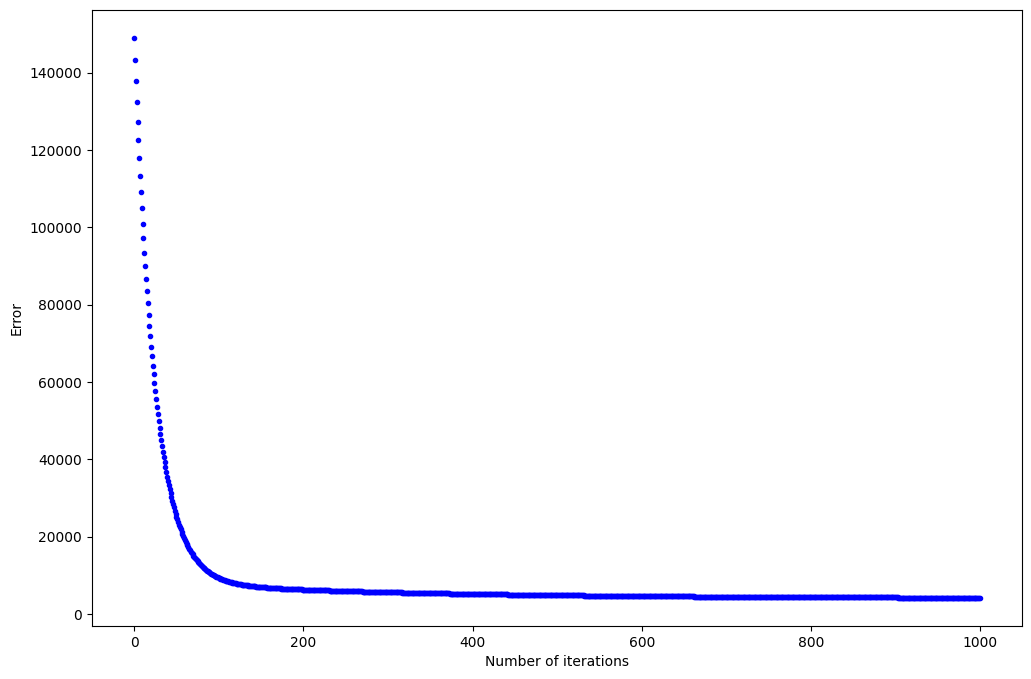

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

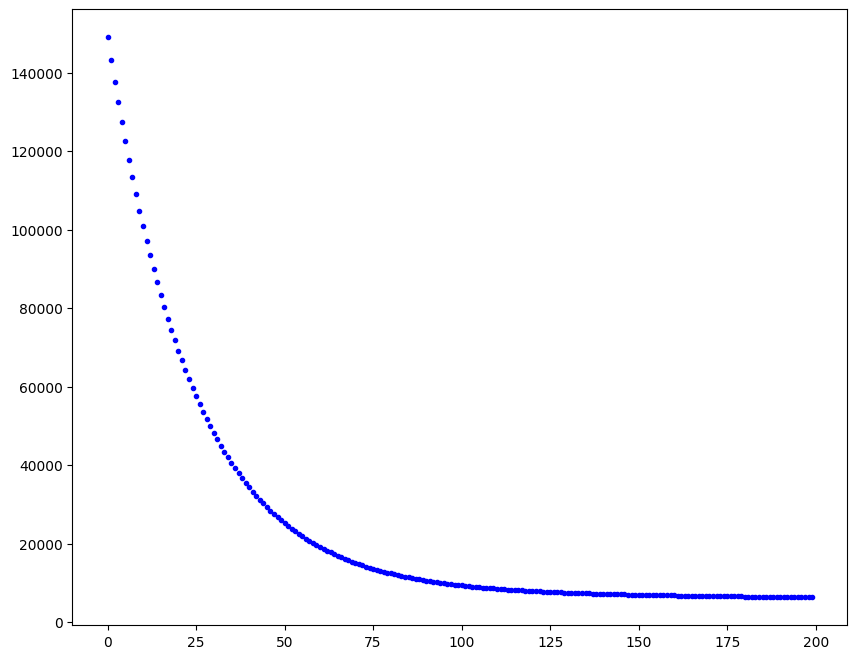

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# **Stochastic Gradient Descent**
In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [12]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [13]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


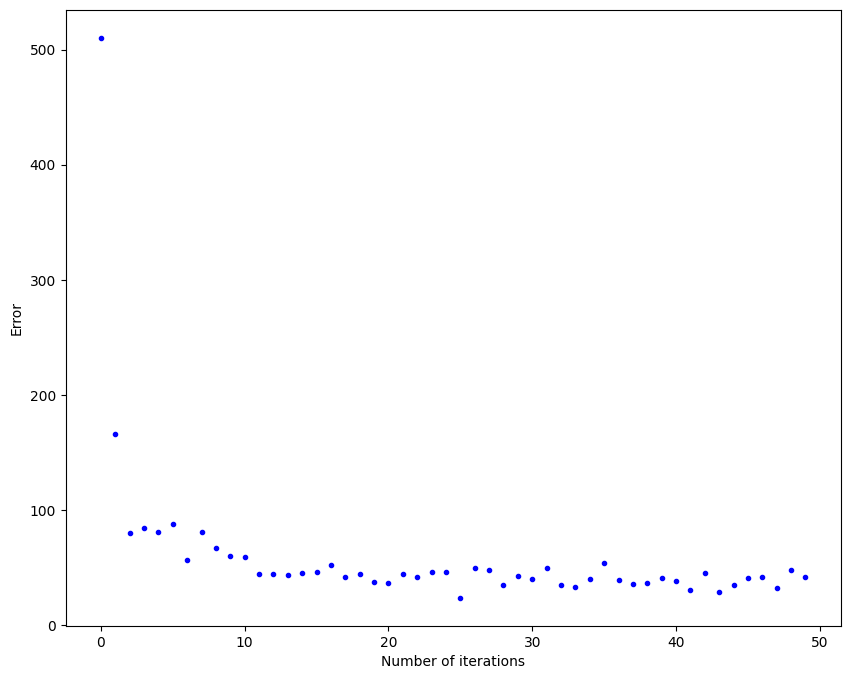

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# **Mini Batch Gradient Descent**
We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used. Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [15]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [16]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


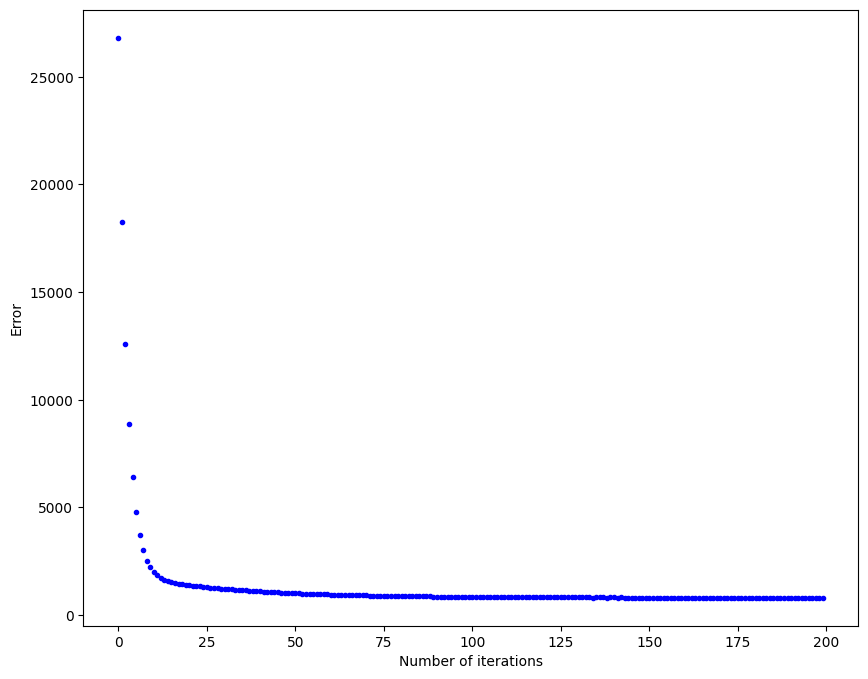

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:


1.  Change batch size in mini-batch gradient descent.
2.  Test all the three out on real datasets.
3.  Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.



# **QUESTION 1**
In mini-batch gradient descent, the batch size is a hyperparameter that determines the number of examples used in each iteration to update the model parameters. Changing the batch size can impact the convergence speed and the quality of the final model. Smaller batch sizes introduce more noise but can converge faster, while larger batch sizes provide a smoother update but might converge slower.

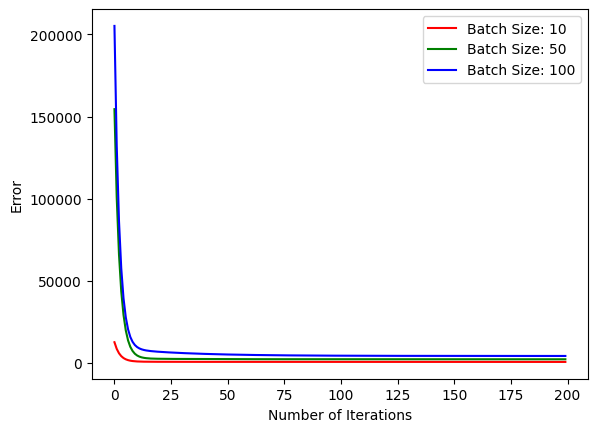

In [18]:
# Try different batch sizes
batch_sizes = [10, 50, 100]

# Define colors for each batch size
colors = ['red', 'green', 'blue']

for i, batch_size in enumerate(batch_sizes):
    y_pred = np.random.randn(2, 1)
    y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size)

    # Plotting with different colors
    plt.plot(range(n_iter), cost_history, label=f'Batch Size: {batch_size}', color=colors[i])

plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

# **QUESTION 2**

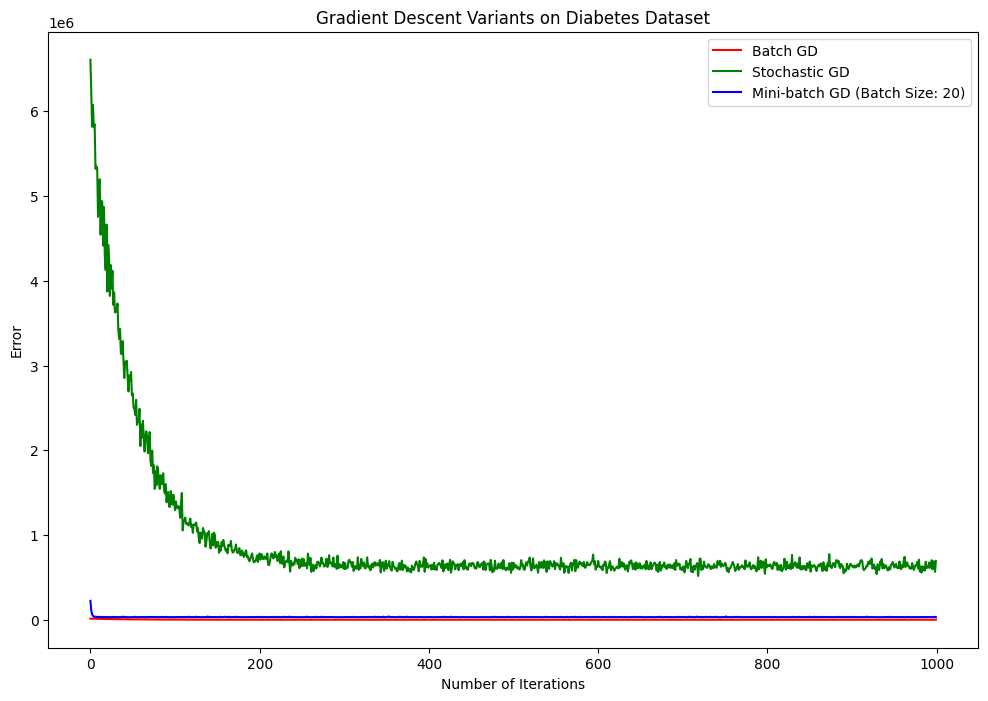

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target.reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Set hyperparameters
lr = 0.01
n_iter = 1000
batch_size = 20

# Function to calculate cost
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Batch Gradient Descent
def batch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Mini-batch Gradient Descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m, n = X.shape
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            # Add bias term to X_i
            X_i = np.c_[np.ones(len(X_i)), X_i]

            # Ensure y_pred has the correct shape
            if y_pred.shape[0] != X_i.shape[1]:
                y_pred = np.random.randn(X_i.shape[1], 1)

            # Calculate predictions for the batch
            predictions = np.dot(X_i, y_pred)

            # Update weights using the average gradient over the batch
            gradient = X_i.T.dot(predictions - y_i)
            y_pred = y_pred - (1 / batch_size) * learning_rate * gradient

            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history




# Initialize random weights
y_pred_initial = np.random.randn(X.shape[1] + 1, 1)

# Apply Batch Gradient Descent
y_pred_batch, cost_history_batch = batch_gradient_descent(np.c_[np.ones((len(X), 1)), X], y, y_pred_initial.copy(), lr, n_iter)

# Apply Stochastic Gradient Descent
y_pred_stochastic, cost_history_stochastic = stochastic_gradient_descent(np.c_[np.ones((len(X), 1)), X], y, y_pred_initial.copy(), lr, n_iter)

# Apply Mini-batch Gradient Descent
y_pred_mini_batch, cost_history_mini_batch = minibatch_gradient_descent(np.c_[np.ones((len(X), 1)), X], y, y_pred_initial.copy(), lr, n_iter, batch_size)

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(range(n_iter), cost_history_batch, label='Batch GD', color='red')
plt.plot(range(n_iter), cost_history_stochastic, label='Stochastic GD', color='green')
plt.plot(range(n_iter), cost_history_mini_batch, label=f'Mini-batch GD (Batch Size: {batch_size})', color='blue')

plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.legend()
plt.title('Gradient Descent Variants on Diabetes Dataset')
plt.show()

# **QUESTION 3**
**1. Batch Gradient Descent (BGD):**


*   Small Learning Rate : With a small learning rate, BGD converges slowly. Each weight update is a fraction of the overall gradient, making the algorithm take small steps towards the minimum. While this reduces the risk of overshooting, it can result in slow convergence, especially in large datasets.

*  Large Learning Rate : A large learning rate in BGD can lead to faster convergence initially. However, it comes with the risk of overshooting the minimum and oscillating around it. The algorithm may fail to converge if the learning rate is too large.

*   Optimal Learning Rate : The optimal learning rate is a balance between convergence speed and stability. It allows the algorithm to converge efficiently without the risk of divergence.

**2. Stochastic Gradient Descent (SGD):**


*   Small Learning Rate : A small learning rate in SGD results in slow convergence. However, it can be more resilient to noisy data points since each update is based on a single example. This can help avoid overshooting.

*  Large Learning Rate : A large learning rate accelerates convergence but makes the algorithm more sensitive to noisy examples. It increases the risk of overshooting and oscillations.

*  Optimal Learning Rate : The optimal learning rate for SGD balances the need for fast convergence with the requirement to handle individual examples robustly.

**3. Mini-batch Gradient Descent (MBGD):**



*  Small Learning Rate : Similar to BGD, a small learning rate in MBGD results in slow convergence. However, the inclusion of mini-batches provides some resilience to noisy data.
*  Large Learning Rate : A large learning rate accelerates convergence in MBGD, but the inclusion of mini-batches helps mitigate the sensitivity to noisy examples compared to pure SGD.
*  Optimal Learning Rate : The optimal learning rate for MBGD balances the advantages of both BGD and SGD. It allows for faster convergence while providing some robustness to noisy examples through the use of mini-batches.

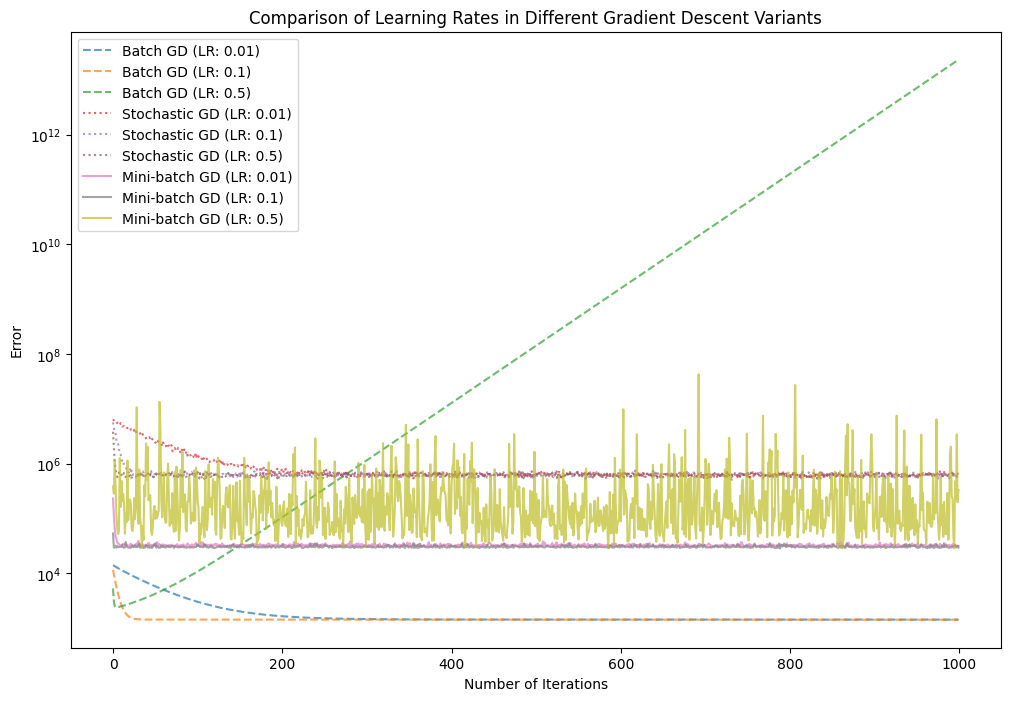

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assume X, y, and the gradient descent functions are defined as before

# Set common parameters
n_iter = 1000
batch_size = 20

# Learning rates to compare
learning_rates = [0.01, 0.1, 0.5]

# Initialize random weights
y_pred_initial = np.random.randn(X.shape[1] + 1, 1)

# Lists to store results
cost_histories_batch = []
cost_histories_stochastic = []
cost_histories_mini_batch = []

# Compare effects of changing learning rate in Batch GD
for lr in learning_rates:
    y_pred_batch, cost_history_batch = batch_gradient_descent(np.c_[np.ones((len(X), 1)), X], y, y_pred_initial.copy(), lr, n_iter)
    cost_histories_batch.append(cost_history_batch)

# Compare effects of changing learning rate in Stochastic GD
for lr in learning_rates:
    y_pred_stochastic, cost_history_stochastic = stochastic_gradient_descent(np.c_[np.ones((len(X), 1)), X], y, y_pred_initial.copy(), lr, n_iter)
    cost_histories_stochastic.append(cost_history_stochastic)

# Compare effects of changing learning rate in Mini-batch GD
for lr in learning_rates:
    y_pred_mini_batch, cost_history_mini_batch = minibatch_gradient_descent(np.c_[np.ones((len(X), 1)), X], y, y_pred_initial.copy(), lr, n_iter, batch_size)
    cost_histories_mini_batch.append(cost_history_mini_batch)

# Plotting
plt.figure(figsize=(12, 8))

# Batch GD
for i, lr in enumerate(learning_rates):
    plt.plot(range(n_iter), cost_histories_batch[i], label=f'Batch GD (LR: {lr})', linestyle='dashed', color=f'C{i}', alpha=0.7)

# Stochastic GD
for i, lr in enumerate(learning_rates):
    plt.plot(range(n_iter), cost_histories_stochastic[i], label=f'Stochastic GD (LR: {lr})', linestyle='dotted', color=f'C{i + len(learning_rates)}', alpha=0.7)

# Mini-batch GD
for i, lr in enumerate(learning_rates):
    plt.plot(range(n_iter), cost_histories_mini_batch[i], label=f'Mini-batch GD (LR: {lr})', color=f'C{i + 2 * len(learning_rates)}', alpha=0.7)

plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.yscale('log')  # Change y-axis scale to logarithmic
plt.legend()
plt.title('Comparison of Learning Rates in Different Gradient Descent Variants')
plt.show()